In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#helper functions

def show_image(image):

    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

def initial_image_processing_canny(image, canny_min=50, canny_max=150):
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    after_canny = cv2.Canny(blurred_image, canny_min, canny_max)
    
    return after_canny

def show_contours_with_random_colors(image, contours):

    contour_image = np.zeros_like(image)
    
    for contour in contours:

        color = np.random.randint(0, 255, 3).tolist()  
        cv2.drawContours(contour_image, [contour], -1, color, 2)
    
    show_image(contour_image)
    
def contours_filtering(contours, min_area=2000, vertex_count_min=4, vertex_count_max=4):

    filtered = []

    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if vertex_count_min <= len(approx) <= vertex_count_max:
            area = cv2.contourArea(contour)
            
            if area > min_area:
                filtered.append(contour)

    return filtered


def show_contours(contours, output_image):

    for contour in contours:
        cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 3)
        
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    show_image(output_image)
    

def initial_image_processing_sobel(image, sobel_ksize=3, threshold_value=100):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=sobel_ksize)
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=sobel_ksize)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)

    sobel_combined = np.uint8(np.absolute(sobel_combined))
    _, edge_image = cv2.threshold(sobel_combined, threshold_value, 255, cv2.THRESH_BINARY)

    return edge_image

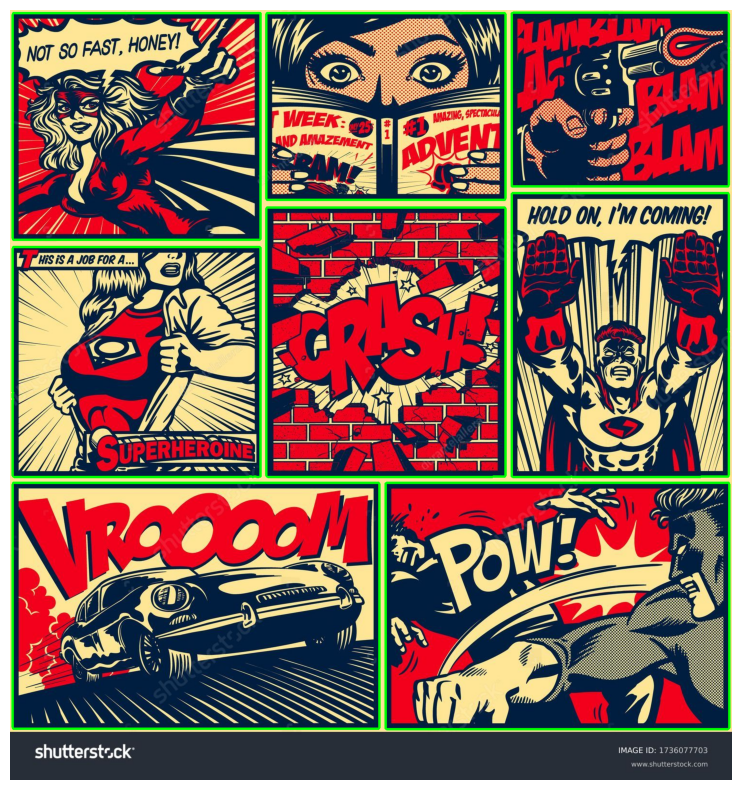

In [ ]:
#base algo

def approx_algo(image_path):

    image = cv2.imread(image_path)

    after_canny = initial_image_processing_canny(image)

    contours, _ = cv2.findContours(after_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    output_image = image.copy()

    filtered_contours = contours_filtering(contours)

    show_contours(filtered_contours, output_image)




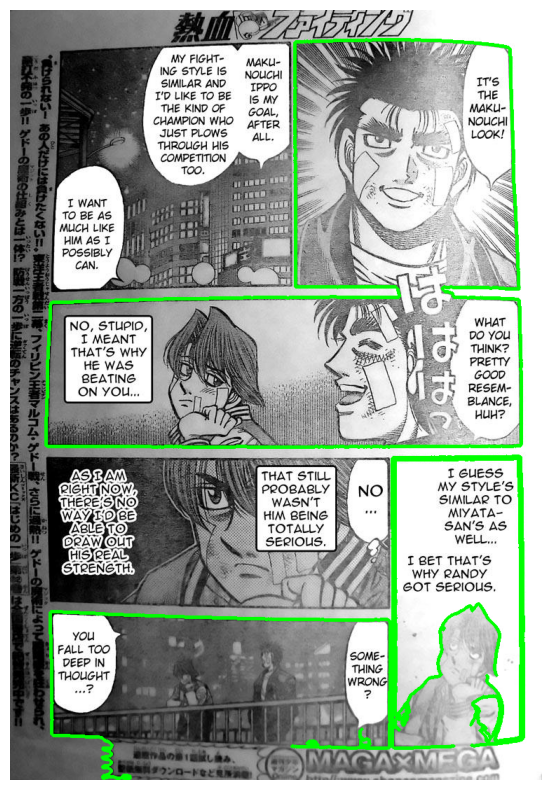

In [ ]:
#sorting algos

def sorting_algo_area(image_path, n):

    image = cv2.imread(image_path)

    after_canny = initial_image_processing_canny(image, 50, 250)

    contours, _ = cv2.findContours(after_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    output_image = image.copy()

    contours = list(contours)


    contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)

    show_contours(contours[:n], output_image)

def sorting_algo_length(image_path, n):

    image = cv2.imread(image_path)
    
    after_canny = initial_image_processing_canny(image, 50, 250)

    contours, _ = cv2.findContours(after_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    output_image = image.copy()

    contours = list(contours)


    contours.sort(key=lambda x: cv2.arcLength(x, True), reverse=True)

    show_contours(contours[:n], output_image)
